### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [103]:
lista_alumnos = [("Juan Maniglia", 32, 1.75),
                ("Ronald", 34, 1.74),
                ("Javier", 39, 1.78),
                ("Felipe", 32, 1.79),
                ("Abdon", 28, 1.70),
                ("Denisia", 34, 1.71),
                ("Sergio", 25, 1.70),
                ("Andrés", 32, 1.71),
                ("Gabriel", 32, 1.69),
                ("Isabel", 23, 1.69),
                ("Nuria", 19, 1.68),
                ("Angel", 40, 1.70)
                ] 

In [104]:
import pandas as pd

In [105]:
df = pd.DataFrame(lista_alumnos, columns= ['nombre', 'edad', 'altura'])
df

,nombre,edad,altura
0,Juan Maniglia,32,1.75
1,Ronald,34,1.74
2,Javier,39,1.78
3,Felipe,32,1.79
4,Abdon,28,1.70
5,Denisia,34,1.71
6,Sergio,25,1.70
7,Andrés,32,1.71
8,Gabriel,32,1.69
9,Isabel,23,1.69


In [106]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nombre  12 non-null     object 
 1   edad    12 non-null     int64  
 2   altura  12 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 420.0+ bytes


In [107]:
df.describe()

,edad,altura
count,12.000000,12.000000
mean,30.833333,1.720000
std,6.176691,0.036432
min,19.000000,1.680000
25%,27.250000,1.697500
50%,32.000000,1.705000
75%,34.000000,1.742500
max,40.000000,1.790000


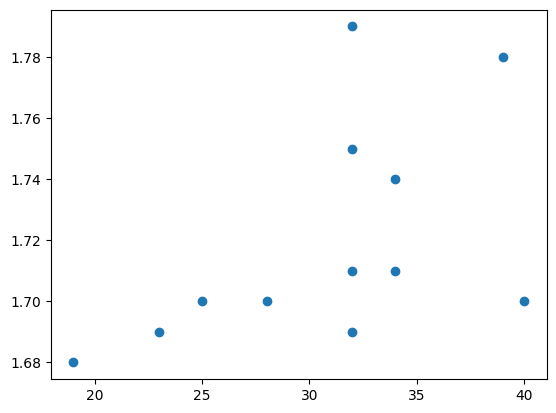

In [108]:
import matplotlib.pyplot as plt

plt.scatter(df['edad'],df['altura'])

agv_Una relación lineal entre altura y edad no es una buena aproximación, ya que ambas variables no guardan esa relación lineal, de hecho, no tienen una relación directa general clara.

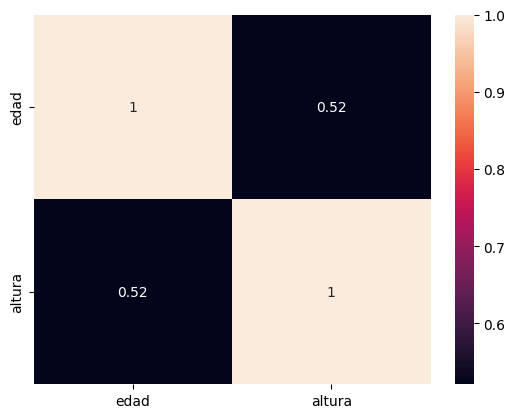

In [109]:
import seaborn as sns
sns.heatmap(df[['edad', 'altura']].corr(), annot=True);

agv_los datos no están mas correlacionados que la pura probabilidad de azar.

/var/folders/lh/mx1_xdkx76s1jt00m2qwl2km0000gn/T/ipykernel_40412/1732590516.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['altura']);


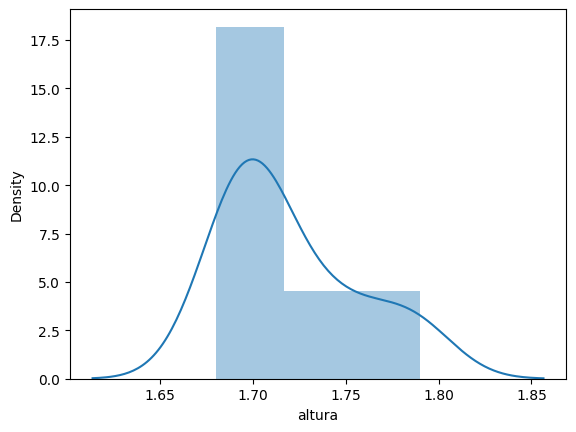

In [110]:
sns.distplot(df['altura']);

In [111]:
X = df.drop(['nombre', 'altura'], axis=1 )
y = df['altura']


In [112]:
from sklearn.model_selection import train_test_split


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.5,
                                                    random_state=42)


In [114]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (12, 1)
Train features shape: (6, 1)
Train target shape: (6,)
Test features shape: (6, 1)
Test target shape: (6,)


In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

model =LinearRegression()
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular MSE (Error Cuadrático Medio)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calcular RMSE (Raíz del Error Cuadrático Medio)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Mostrar resultados
print("Resultados en el conjunto de entrenamiento:")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print("\nResultados en el conjunto de prueba:")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")

Resultados en el conjunto de entrenamiento:
MSE: 0.0011
RMSE: 0.0328

Resultados en el conjunto de prueba:
MSE: 0.0011
RMSE: 0.0328


In [116]:
print(model.intercept_, model.coef_)

1.6985696361355083 [0.00077792]


(Altura) = 1.85 - 0.0041*(Edad)

In [117]:
# Prediccion
model.predict(X_test)

array([1.71335006, 1.71646173, 1.72346299, 1.72346299, 1.72501882,
       1.72890841])

In [118]:
df_test = pd.DataFrame(X_test)
df_test

,edad
10,19
9,23
0,32
8,32
5,34
2,39


In [119]:
df_test = pd.DataFrame(X_test)
df_test['predict_height'] = model.predict(X_test)
df_test

,edad,predict_height
10,19,1.713350
9,23,1.716462
0,32,1.723463
8,32,1.723463
5,34,1.725019
2,39,1.728908


In [120]:
df_test['real_height'] = y_test
df_test

,edad,predict_height,real_height
10,19,1.713350,1.68
9,23,1.716462,1.69
0,32,1.723463,1.75
8,32,1.723463,1.69
5,34,1.725019,1.71
2,39,1.728908,1.78


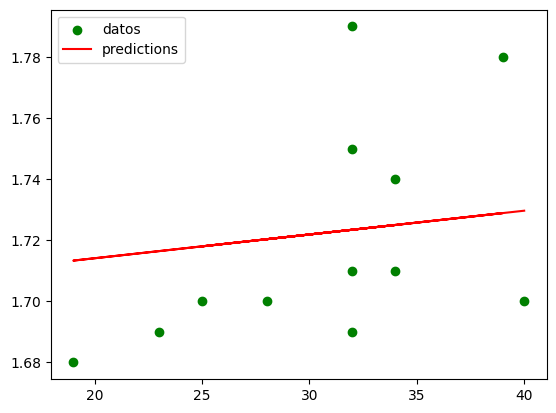

In [121]:
plt.scatter(df['edad'], df['altura'], color='g', label="datos");
plt.plot(df['edad'], model.predict(X), color='r', label="predictions");
plt.legend()
# plt.xlim(0,45)

In [122]:
model.score(X,y)

0.11470555360519064

In [123]:
df_test

,edad,predict_height,real_height
10,19,1.713350,1.68
9,23,1.716462,1.69
0,32,1.723463,1.75
8,32,1.723463,1.69
5,34,1.725019,1.71
2,39,1.728908,1.78


In [124]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [125]:
print('MAE:', mean_absolute_error(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

MAE: 0.030987034713509092
MSE: 0.001078725060045858
RMSE: 0.0328439501285375


In [126]:
print('MAPE:', mean_absolute_percentage_error(y_test, y_test_pred))

MAPE: 0.01799328782541007


In [127]:
model.predict([[85]])

/Users/angelg.villanueva/Documents/04_DATA/041_DATASCIENCE_BOOTCAMP/DS102024_2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.7646926])

In [128]:
df_test

,edad,predict_height,real_height
10,19,1.713350,1.68
9,23,1.716462,1.69
0,32,1.723463,1.75
8,32,1.723463,1.69
5,34,1.725019,1.71
2,39,1.728908,1.78


In [129]:
df_test['error'] = df_test['real_height']-df_test['predict_height']
df_test

,edad,predict_height,real_height,error
10,19,1.713350,1.68,-0.033350
9,23,1.716462,1.69,-0.026462
0,32,1.723463,1.75,0.026537
8,32,1.723463,1.69,-0.033463
5,34,1.725019,1.71,-0.015019
2,39,1.728908,1.78,0.051092


In [102]:
df_test['error'].mean()

np.float64(0.0035693581780536685)

In [131]:
df_test['error_cuadratico'] = (df_test['real_height']-df_test['predict_height'])**2
df_test

,edad,predict_height,real_height,error,error_cuadratico
10,19,1.713350,1.68,-0.033350,0.001112
9,23,1.716462,1.69,-0.026462,0.000700
0,32,1.723463,1.75,0.026537,0.000704
8,32,1.723463,1.69,-0.033463,0.001120
5,34,1.725019,1.71,-0.015019,0.000226
2,39,1.728908,1.78,0.051092,0.002610


In [132]:
df_test['error_cuadratico'].mean()

np.float64(0.001078725060045858)

In [133]:
np.sqrt(df_test['error_cuadratico'].mean())

np.float64(0.0328439501285375)

In [134]:
df_test['error'].mean()/df_test['real_height'].mean()

np.float64(-0.002977183856939355)